# simulation experiment
The composition schema was developed for integrative simulations, but can also be used for workflows such as simulation experiments.

In [15]:
import inspect
from bigraph_viz import plot_bigraph, plot_flow
from typing import Any

plot_settings = {
    'remove_process_place_edges': True,
}
save_images = False
if save_images:
    plot_settings.update({
        'out_dir': 'out',
        'dpi': '250'
    })

## inspect function signature

In [12]:
def original_function(a, b, c):
    return a + b + c

def extended_function(a, b, c, d=0, e=0):
    return original_function(a, b, c) + d + e

result = extended_function(1, 2, 3, d=4, e=5)
print(result)  # Output: 15

15


In [13]:
def some_function(a, b, c=0):
    pass

signature = inspect.signature(some_function)
print(signature)  # Output: (a, b, c=0)


(a, b, c=0)


In [14]:
def func_a(a, b, c=0):
    pass

def func_b(x, y, z=0):
    pass

def func_c(a, b, c=0):
    pass

functions = [func_a, func_b, func_c]
target_signature = inspect.signature(func_a)

for func in functions:
    if inspect.signature(func) == target_signature:
        print(f"Found function with matching signature: {func.__name__}")

Found function with matching signature: func_a
Found function with matching signature: func_c


## add typing

In [16]:
def original_function(a: int, b: int, c: int) -> int:
    return a + b + c

def extended_function(a: int, b: int, c: int, d: int = 0, e: int = 0) -> int:
    return original_function(a, b, c) + d + e

result = extended_function(1, 2, 3, d=4, e=5)
print(result)  # Output: 15

15


In [17]:
def some_function(a: int, b: int, c: int = 0) -> int:
    pass

signature = inspect.signature(some_function)
print(signature)  # Output: (a:int, b:int, c:int=0) -> int


(a: int, b: int, c: int = 0) -> int


In [18]:
def func_a(a: int, b: int, c: int = 0) -> int:
    pass

def func_b(x: int, y: int, z: int = 0) -> int:
    pass

def func_c(a: int, b: int, c: int = 0) -> int:
    pass

functions = [func_a, func_b, func_c]
target_signature = inspect.signature(func_a)

for func in functions:
    if inspect.signature(func) == target_signature:
        print(f"Found function with matching signature: {func.__name__}")


Found function with matching signature: func_a
Found function with matching signature: func_c


## docstring for annotation

In [19]:
def original_function(a: int, b: int, c: int) -> int:
    """
    This function takes three integers and returns their sum.
    """
    return a + b + c

def extended_function(a: int, b: int, c: int, d: int = 0, e: int = 0) -> int:
    """
    This function extends original_function by adding two additional integers.
    """
    return original_function(a, b, c) + d + e

docstring = original_function.__doc__
print(docstring)


    This function takes three integers and returns their sum.
    


In [22]:
import inspect

def match_signature_and_docstring(func1, func2):
    return (
        inspect.signature(func1) == inspect.signature(func2)
        and func1.__doc__ == func2.__doc__
    )

def func_a(a: int, b: int, c: int = 0) -> int:
    """
    This is func_a
    """
    pass

def func_b(x: int, y: int, z: int = 0) -> int:
    """
    This is func_b
    """
    pass

def func_c(a: int, b: int, c: int = 0) -> int:
    """
    This is func_a
    """
    pass

functions = [func_a, func_b, func_c]
target_function = func_a

for func in functions:
    if match_signature_and_docstring(func, target_function):
        print(f"Found function with matching signature and docstring: {func.__name__}")


Found function with matching signature and docstring: func_a
Found function with matching signature and docstring: func_c


## use decorators

In [23]:
def describe(description):
    def decorator(func):
        func.description = description
        return func
    return decorator

@describe("This is func_a")
def func_a(a: int, b: int, c: int = 0) -> int:
    pass

@describe("This is func_b")
def func_b(x: int, y: int, z: int = 0) -> int:
    pass

@describe("This is func_c")
def func_c(a: int, b: int, c: int = 0) -> int:
    pass

print(func_a.description)  # Output: This is func_a

This is func_a


In [24]:
def match_signature_and_description(func1, func2):
    return (
        inspect.signature(func1) == inspect.signature(func2)
        and getattr(func1, "description", None) == getattr(func2, "description", None)
    )

functions = [func_a, func_b, func_c]
target_function = func_a

for func in functions:
    if match_signature_and_description(func, target_function):
        print(f"Found function with matching signature and description: {func.__name__}")


Found function with matching signature and description: func_a


## simulation experiment design with bigraph-schema

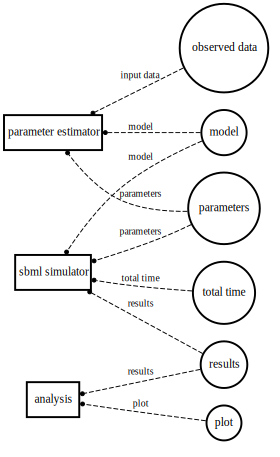

In [6]:
simulation_experiment_spec = {
    # '_type': 'sbml_simulation_experiment',
    'parameter estimator': {
        '_type': 'process:step',
        # '_address': 'COPASI:',
        '_ports': {
            'input data': 'Any', 
            'model': 'SBML', 
            'parameters': 'Any',
        },
        'wires': {
            'input data': 'observed data',
            'model': 'model',
            'parameters': 'parameters',
        },
        '_depends_on': []
    },
    'sbml simulator': {
        '_ports': {
            'model': 'SBML', 
            'parameters': 'Any',
            'total time': 'time',
            'results': 'Any'
        },
        'wires': {
            'parameters': 'parameters',
            'model': 'model',
            'total time': 'total time',
            'results': 'results',
        },
        '_depends_on': ['parameter estimator'],
    },
    'analysis': {
        '_ports': {
            'results': 'Any',
            'plot': 'Any',
        },
        'wires': {
            'results': 'results',
            'plot': 'plot',
        },
        '_depends_on': ['simulator'],
    },
    'parameters': 'Any',
    'model': 'Any',
    'results': 'Any',
    'observed data': 'Any',
    'total time': 'Any',
}

plot_bigraph(simulation_experiment_spec, **plot_settings, rankdir='RL', filename='simulation_experiment')

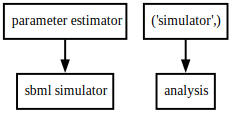

In [7]:
plot_flow(simulation_experiment_spec)

In [8]:
def f(x:type) -> y:type

NameError: name 'y' is not defined